In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm

In [3]:
import matplotlib.pyplot as plt

In [4]:
from rqc.CT_classical_markov import * 

In [8]:
ct = CT_classical_markov(L=4,seed_C=1,seed=0)

In [5]:
ct.vec = ct.random_control(ct.vec,0.5)
# ct.vec = ct.random_control(ct.vec,0.9)

In [9]:
ct.FDW(ct.vec)

(0.0, 0.0)

In [ ]:
ct.fdw_vec.flatt

In [89]:
def run_markov(L,p,sC,sm):
    ct = CT_classical_markov(L,seed_C=sC,seed=sm)
    tf = 2*L**2
    FDW_list = np.zeros((tf+1,2))
    FDW_list[0] = ct.FDW(ct.vec)
    for i in (range(tf)):
        ct.vec = ct.random_control(ct.vec,p)
        FDW_list[i+1] = ct.FDW(ct.vec)
    return FDW_list

In [ ]:
# L=10
# p=0.5
def run_map(L,p):
    sC_list = range(100)
    sm_list = range(100)
    FDW_map = np.zeros((len(sC_list),len(sm_list),2*L**2+1,2))
    iteration = [(sC,sm) for sC in sC_list for sm in sm_list]
    for sC,sm in tqdm(iteration):
        FDW_map[sC,sm] = run(L=L,p=p,sC=sC,sm=sm)
    return FDW_map

In [69]:
FDW_dict = {}

In [70]:
FDW_dict[0.5] = run_map(L=10,p=0.5)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [16:43<00:00,  9.96it/s]


In [71]:
FDW_dict[0.5].shape

(100, 100, 201, 2)

In [72]:
L=10

(array([0.21656681, 0.54141702, 0.21656681, 1.51596767, 0.86626724,
        1.19111745, 0.54141702, 0.86626724, 1.19111745, 0.64970043,
        0.64970043, 0.54141702, 0.21656681, 0.32485021, 0.21656681,
        0.21656681, 0.32485021, 0.1082834 , 0.1082834 , 0.32485021]),
 array([0.60829989, 0.70065015, 0.7930004 , 0.88535066, 0.97770091,
        1.07005117, 1.16240142, 1.25475168, 1.34710193, 1.43945218,
        1.53180244, 1.62415269, 1.71650295, 1.8088532 , 1.90120346,
        1.99355371, 2.08590397, 2.17825422, 2.27060448, 2.36295473,
        2.45530499]),
 <BarContainer object of 20 artists>)

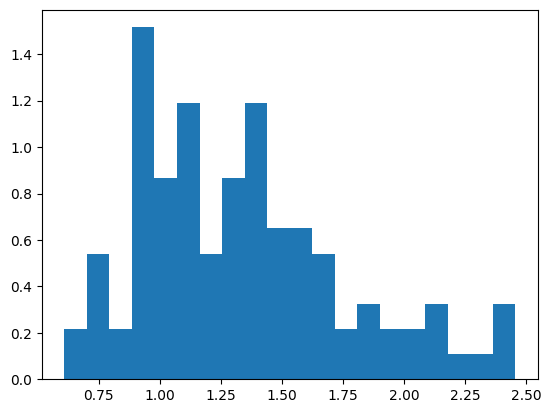

In [87]:
plt.hist((FDW_dict[0.5][:,:,L**2:,1] - FDW_dict[0.5][:,:,L**2:,0]**2).reshape((100,-1)).mean(axis=1),bins=20,density=True)

In [14]:
import matplotlib.pyplot as plt

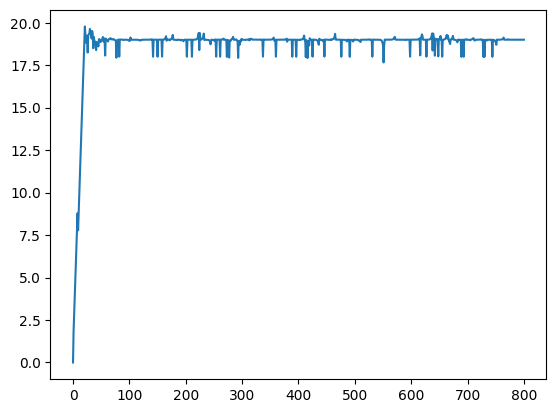

In [43]:
plt.plot(FDW_list[:,0])

In [57]:
FDW_list[:,0][-1]

18.999988709157527

In [60]:
zz=ct.T_tensor(ct.vec)

In [61]:
zz

array([[[[0.25188981, 0.        ],
         [0.24543217, 0.        ]],

        [[0.25662286, 0.        ],
         [0.24605516, 0.        ]]],


       [[[0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [0.        , 0.        ]]]])

In [95]:
ct.S_tensor(zz,None)

array([[[[0.02956874, 0.1047633 ],
         [0.11450397, 0.0068323 ]],

        [[0.02162905, 0.08207135],
         [0.15763076, 0.00697931]]],


       [[[0.02202205, 0.07906786],
         [0.09944378, 0.00546847]],

        [[0.02168314, 0.08234601],
         [0.15896787, 0.00702205]]]])

In [83]:
zz=ct.R_tensor(ct.vec,[0],[ct.L-1])

In [99]:
ct.vec

array([[[[0.03622813, 0.52495806],
         [0.01966709, 0.41914672]],

        [[0.        , 0.        ],
         [0.        , 0.        ]]],


       [[[0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [0.        , 0.        ]]]])

In [100]:
ct.inner_prob(ct.vec,pos=[ct.L-1],n_list=[0])

0.05589522394638856

In [101]:
ct.inner_prob(ct.vec,pos=[ct.L-1],n_list=[1])

0.944104776053612

In [ ]:

print(ct.vec)

[[[[0.02660891 0.04493825]
   [0.02350972 0.03553631]]

  [[0.02675334 0.05689718]
   [0.00866949 0.012753  ]]]


 [[[0.07882269 0.09406918]
   [0.11953468 0.18185515]]

  [[0.07434414 0.15897319]
   [0.02298862 0.03374614]]]]
